Лучшее найденное решение (мой ГА): x1 = 3.286964, x2 = 2.987480
Значение функции в этой точке (мой ГА): -0.934812
Известный оптимум: f(x1,x2) = -1 при (x1,x2) = (pi, pi)
Лучшее найденное решение (встроенный ГА): x1 = 3.141593, x2 = 3.141593
Значение функции в этой точке (встроенный ГА): -1.000000


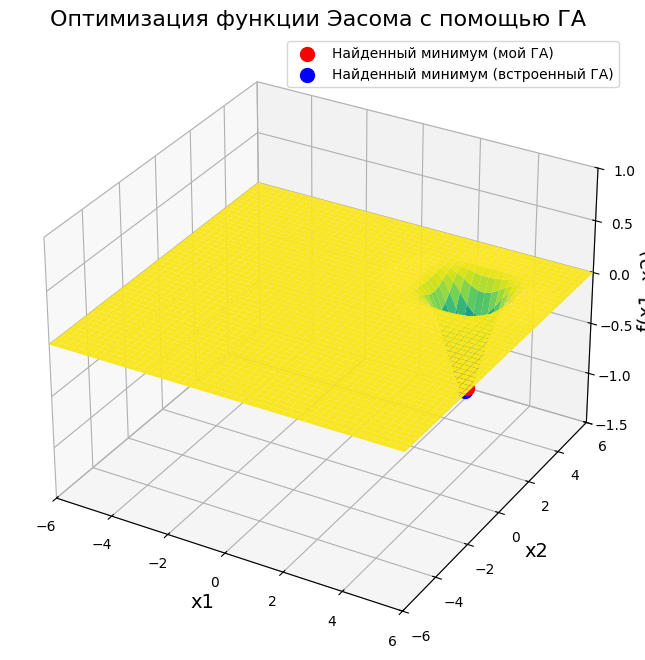

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import differential_evolution


# Функция Эасома
def fEaso(x):
    return -np.cos(x[0]) * np.cos(x[1]) * np.exp(-((x[0] - np.pi) ** 2 + (x[1] - np.pi) ** 2))


# Параметры генетического алгоритма
N = 100  # Размер популяции
generations = 100  # Количество поколений
mutation_rate = 0.05  # Вероятность мутации
crossover_rate = 0.8  # Вероятность кроссинговера

# Увеличенные диапазоны значений x1 и x2
x_min = -6
x_max = 6

# Инициализация начальной популяции
population = np.random.uniform(x_min, x_max, (N, 2))

best_fitness_history = []
best_solution = population[0]
best_fitness = fEaso(best_solution)

for generation in range(generations):
    # Оценка популяции
    fitness_values = np.array([fEaso(ind) for ind in population])

    # Поиск лучшего решения
    current_best_fitness = np.min(fitness_values)
    best_idx = np.argmin(fitness_values)

    if current_best_fitness < best_fitness:
        best_fitness = current_best_fitness
        best_solution = population[best_idx]

    best_fitness_history.append(best_fitness)

    # Селекция: турнирный отбор
    new_population = np.copy(population)
    for i in range(0, N, 2):
        idx1, idx2 = np.random.choice(N, 2, replace=False)
        parents = population[[idx1, idx2]]

        # Кроссинговер
        if np.random.rand() < crossover_rate:
            alpha = np.random.rand()
            child1 = alpha * parents[0] + (1 - alpha) * parents[1]
            child2 = (1 - alpha) * parents[0] + alpha * parents[1]
        else:
            child1, child2 = parents

        # Мутация
        if np.random.rand() < mutation_rate:
            child1 = np.random.uniform(x_min, x_max, 2)
        if np.random.rand() < mutation_rate:
            child2 = np.random.uniform(x_min, x_max, 2)

        new_population[i] = child1
        new_population[i + 1] = child2

    population = new_population

# Вывод результатов для вашего алгоритма
print(f'Лучшее найденное решение (мой ГА): x1 = {best_solution[0]:.6f}, x2 = {best_solution[1]:.6f}')
print(f'Значение функции в этой точке (мой ГА): {best_fitness:.6f}')
print(f'Известный оптимум: f(x1,x2) = -1 при (x1,x2) = (pi, pi)')

# Построение 3D-графика функции
x1 = np.linspace(x_min, x_max, 100)
x2 = np.linspace(x_min, x_max, 100)
x1, x2 = np.meshgrid(x1, x2)
z = fEaso([x1, x2])

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(x1, x2, z, cmap='viridis', edgecolor='none')

# Установ границы осей
ax.set_xlim([x_min, x_max])
ax.set_ylim([x_min, x_max])
ax.set_zlim([-1.5, 1])  # Измен по необходимости, чтобы улучшить видимость

ax.set_title('Оптимизация функции Эасома с помощью ГА', fontsize=16)
ax.set_xlabel('x1', fontsize=14)
ax.set_ylabel('x2', fontsize=14)
ax.set_zlabel('f(x1, x2)', fontsize=14)

# Отображение найденного экстремума (ваш ГА)
ax.scatter(best_solution[0], best_solution[1], best_fitness, color='red', s=100, label='Найденный минимум (мой ГА)')

# Встроенный ГА из SciPy для сравнения
bounds = [(x_min, x_max), (x_min, x_max)]
result = differential_evolution(fEaso, bounds)
ga_best_solution = result.x
ga_best_fitness = result.fun

# Вывод результатов для встроенного ГА
print(f'Лучшее найденное решение (встроенный ГА): x1 = {ga_best_solution[0]:.6f}, x2 = {ga_best_solution[1]:.6f}')
print(f'Значение функции в этой точке (встроенный ГА): {ga_best_fitness:.6f}')

# Отображение найденного решения встроенного ГА на графике
ax.scatter(ga_best_solution[0], ga_best_solution[1], ga_best_fitness, color='blue', s=100,
           label='Найденный минимум (встроенный ГА)')

ax.legend()
plt.show()